# FIFA 19 PLAYER RATINGS PREDICTOR

## CREATING A MODEL THAT CORRECTLY PREDICTS FIFA 19 PLAYERS' RATINGS

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
df_data_1.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [3]:
df_fifa = df_data_1[['Name','Age', 'Overall', 'Potential', 'Value', 'Jersey Number', 'Release Clause']]

In [4]:
df_fifa.head()

,Name,Age,Overall,Potential,Value,Jersey Number,Release Clause
0,L. Messi,31,94,94,€110.5M,10.0,€226.5M
1,Cristiano Ronaldo,33,94,94,€77M,7.0,€127.1M
2,Neymar Jr,26,92,93,€118.5M,10.0,€228.1M
3,De Gea,27,91,93,€72M,1.0,€138.6M
4,K. De Bruyne,27,91,92,€102M,7.0,€196.4M


In [5]:
df_fifa.corr()

,Age,Overall,Potential,Jersey Number
Age,1.000000,0.452350,-0.253312,-0.241156
Overall,0.452350,1.000000,0.660939,-0.218931
Potential,-0.253312,0.660939,1.000000,-0.010474
Jersey Number,-0.241156,-0.218931,-0.010474,1.000000


In [6]:
## convertig the value column to numeric
df_fifa['Value'] = [x[1:-1] for x in df_fifa['Value']]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
## converting the release clause column to numeric
df_fifa['Release Clause'] = df_fifa['Release Clause'].map(lambda x: str(x)[1:-1])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
df_fifa.head()

,Name,Age,Overall,Potential,Value,Jersey Number,Release Clause
0,L. Messi,31,94,94,110.5,10.0,226.5
1,Cristiano Ronaldo,33,94,94,77,7.0,127.1
2,Neymar Jr,26,92,93,118.5,10.0,228.1
3,De Gea,27,91,93,72,1.0,138.6
4,K. De Bruyne,27,91,92,102,7.0,196.4


In [9]:
df_fifa[['Age', 'Overall', 'Potential', 'Value', 'Jersey Number', 'Release Clause']] = df_fifa[['Age', 'Overall', 'Potential', 'Value', 'Jersey Number', 'Release Clause']].convert_objects(convert_numeric = True)
df_fifa.corr()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Age,Overall,Potential,Value,Jersey Number,Release Clause
Age,1.000000,0.452350,-0.253312,-0.044111,-0.241156,-0.041166
Overall,0.452350,1.000000,0.660939,-0.234541,-0.218931,-0.392288
Potential,-0.253312,0.660939,1.000000,-0.236335,-0.010474,-0.385456
Value,-0.044111,-0.234541,-0.236335,1.000000,0.009908,0.280187
Jersey Number,-0.241156,-0.218931,-0.010474,0.009908,1.000000,0.049994
Release Clause,-0.041166,-0.392288,-0.385456,0.280187,0.049994,1.000000


In [10]:
## resetting the index
df_fifa = df_fifa.dropna().reset_index(drop = True)
df_fifa.describe()

,Age,Overall,Potential,Value,Jersey Number,Release Clause
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,25.226221,66.162771,71.140900,268.732620,19.657213,228.201274
std,4.716588,7.008236,6.151409,287.580369,16.054811,299.251866
min,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,5.000000,8.000000,2.500000
50%,25.000000,66.000000,71.000000,170.000000,17.000000,19.800000
75%,29.000000,71.000000,75.000000,475.000000,26.000000,431.000000
max,45.000000,94.000000,95.000000,975.000000,99.000000,999.000000


In [11]:
df_fifa.head()

,Name,Age,Overall,Potential,Value,Jersey Number,Release Clause
0,L. Messi,31,94,94,110.5,10.0,226.5
1,Cristiano Ronaldo,33,94,94,77.0,7.0,127.1
2,Neymar Jr,26,92,93,118.5,10.0,228.1
3,De Gea,27,91,93,72.0,1.0,138.6
4,K. De Bruyne,27,91,92,102.0,7.0,196.4


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

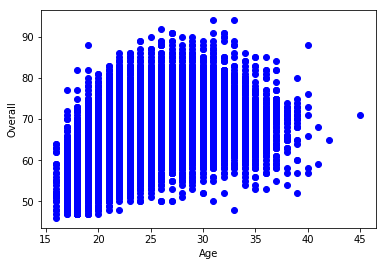

In [13]:
plt.scatter(df_fifa.Age, df_fifa.Overall,  color='blue')
plt.xlabel("Age")
plt.ylabel("Overall")
plt.show()

In [14]:
import numpy as np
split = np.random.rand(len(df_fifa)) < 0.75
train = df_fifa[split]
test = df_fifa[~split]

In [15]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()

In [16]:
## Trainig & fitting the model
fifa_x_train = train[['Age','Value','Potential','Release Clause']]
fifa_y_train = train[['Overall']]
poly = PolynomialFeatures(degree=3)
fifa_x_train_poly = poly.fit_transform(fifa_x_train)
regr.fit(fifa_x_train_poly, fifa_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
## Testing the model
fifa_x_test = test[['Age','Value','Potential','Release Clause']]
fifa_y_test = test[['Overall']]
fifa_x_test_poly = poly.fit_transform(fifa_x_test)

In [18]:
df_fifa_pred = regr.predict(fifa_x_test_poly)

In [19]:
r2_score(fifa_y_test, df_fifa_pred)

0.9711958076067123

In [20]:
fifa_x_test['Predicted Ratings'] = df_fifa_pred

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
df_fifa1 = pd.merge(df_fifa,fifa_x_test)
df_fifa1.head()

,Name,Age,Overall,Potential,Value,Jersey Number,Release Clause,Predicted Ratings
0,Neymar Jr,26,92,93,118.5,10.0,228.1,91.236045
1,E. Hazard,27,91,91,93.0,10.0,172.1,89.563160
2,Sergio Ramos,32,91,91,51.0,15.0,104.6,92.115431
3,D. Godín,32,90,90,44.0,10.0,90.2,90.846535
4,M. ter Stegen,26,89,92,58.0,22.0,123.3,90.891668


In [22]:
df_fifa_pred2 = regr.predict(fifa_x_train_poly)

In [23]:
fifa_x_train['Predicted Ratings'] = df_fifa_pred2

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
df_fifa2 = pd.merge(df_fifa,fifa_x_train)
df_fifa2.head()

,Name,Age,Overall,Potential,Value,Jersey Number,Release Clause,Predicted Ratings
0,L. Messi,31,94,94,110.5,10.0,226.5,96.878090
1,Cristiano Ronaldo,33,94,94,77.0,7.0,127.1,95.528803
2,De Gea,27,91,93,72.0,1.0,138.6,93.007553
3,K. De Bruyne,27,91,92,102.0,7.0,196.4,90.977433
4,L. Modrić,32,91,91,67.0,10.0,137.4,92.126193
